In [2]:
import numpy as np
import matplotlib.pyplot as plt
import random

In [143]:
def activation(x):
    return x

def activation_derivative(x):
    return 1

class NeuralNetwork:
    def __init__(self, x, y, hidden):
        self.input = x
        self.weights1 = np.random.rand(self.input.shape[1], hidden)
        self.weights2 = np.random.rand(hidden, 1)
        
        self.bias1 = np.ones((self.input.shape[0], hidden))
        self.bias2 = np.ones(y.shape)
        
        self.y = y
        self.output = np.zeros(self.y.shape)
        self.loss = []
        
    def feedforward(self):
        self.layer1 = activation(np.dot(self.input, self.weights1) + self.bias1)
        self.output = activation(np.dot(self.layer1, self.weights2) + self.bias2)

    def backpropagation(self, l_rate):
        d_weights2 = np.dot(self.layer1.T, (2*(self.y - self.output) * activation_derivative(self.output)))
        d_weights1 = np.dot(self.input.T,  (np.dot(2*(self.y - self.output) * activation_derivative(self.output), self.weights2.T) * activation_derivative(self.layer1)))
        self.weights1 += l_rate * d_weights1
        self.weights2 += l_rate * d_weights2
        self.bias2 -= l_rate * 2*(self.y - self.output) * activation_derivative(self.output)
        self.bias1 -= l_rate * np.dot(2*(self.y - self.output) * activation_derivative(self.output), self.weights2.T) * activation_derivative(self.layer1)
        self.loss.append(sum((self.y - self.output)**2))
       

In [3]:
# max value 497
training = 497

[[ 304.84]
 [-168.82]
 [ 196.37]
 [-296.75]
 [  55.59]
 [ -32.72]
 [-159.87]
 [  95.62]
 [ -32.61]
 [   1.65]]
[[ 305.05096153]
 [-168.57562563]
 [ 196.57236771]
 [-296.4716211 ]
 [  55.83408912]
 [ -32.4720018 ]
 [-159.6078193 ]
 [  95.84385006]
 [ -32.34921022]
 [   1.89383666]]


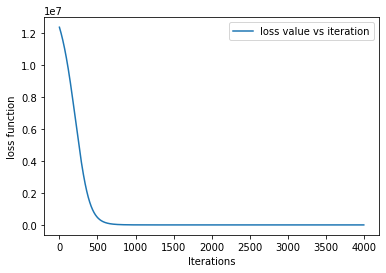

In [148]:
data = np.genfromtxt("data.txt", delimiter = ' ')
X = data[:training,:-1]
y = data[:training, -1:]


print(y[:10])
nn = NeuralNetwork(X, y, 2)
iterations = []
for i in range(4000):
    nn.feedforward()
    nn.backpropagation(0.000000001)
    iterations.append(i)

print(nn.output[:10])
plt.plot(iterations, nn.loss, label='loss value vs iteration')
plt.xlabel('Iterations')
plt.ylabel('loss function')
plt.legend()
plt.show()